In [72]:
import os
os.environ["TF_MIN_CPP_LEVEL_LOG"] = "2"
import cv2
import time
import random
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from pathlib import Path

In [73]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

tf.__version__

'2.4.0'

In [74]:
DATADIR = '../Dataset'
CATEGORIES = ['Fire', 'NoFire']
IMG_SIZE = 64

In [75]:
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

training_data = create_training_data()

100%|██████████| 1300/1300 [00:16<00:00, 78.41it/s] 


In [78]:
print(f"data numbers: {len(training_data)}")
random.shuffle(training_data)
for sample in training_data[:5]:
    print(sample[1], end=" ")

data numbers: 2422
1 1 1 0 0 

In [77]:
X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0

Y = np.array(Y)
X.shape

(2422, 64, 64, 3)

In [15]:
# # set up image augmentation
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
#     #zoom_range=0.3
#     )
# datagen.fit(X)

In [60]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model.summary()

In [119]:
history = model.fit(X, Y, batch_size=32, epochs=100, validation_split=0.1)
# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                     verbose=1)


Epoch 1/100
69/69 [==============================] - 2s 33ms/step - loss: 0.6746 - accuracy: 0.7623 - val_loss: 0.3043 - val_accuracy: 0.8930
Epoch 2/100
69/69 [==============================] - 2s 30ms/step - loss: 0.3613 - accuracy: 0.8444 - val_loss: 0.2460 - val_accuracy: 0.9053
Epoch 3/100
69/69 [==============================] - 2s 30ms/step - loss: 0.2931 - accuracy: 0.8752 - val_loss: 0.2256 - val_accuracy: 0.8930
Epoch 4/100
69/69 [==============================] - 2s 30ms/step - loss: 0.2450 - accuracy: 0.8977 - val_loss: 0.1820 - val_accuracy: 0.9218
Epoch 5/100
69/69 [==============================] - 2s 30ms/step - loss: 0.1825 - accuracy: 0.9266 - val_loss: 0.1624 - val_accuracy: 0.9383
Epoch 6/100
69/69 [==============================] - 2s 32ms/step - loss: 0.1801 - accuracy: 0.9270 - val_loss: 0.1492 - val_accuracy: 0.9342
Epoch 7/100
69/69 [==============================] - 2s 31ms/step - loss: 0.1338 - accuracy: 0.9536 - val_loss: 0.0832 - val_accuracy: 0.9712
Epoch 

In [122]:
model.save('../Models/20210701.h5')

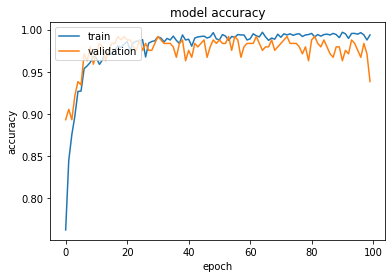

In [121]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

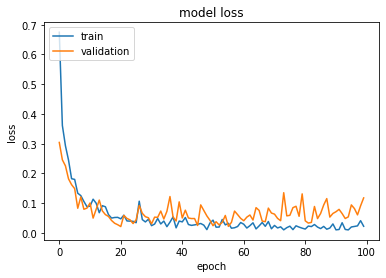

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [81]:
# 单个测试样本数据
test_path = "../Images/test.jpg"
image = cv2.imread(test_path)
image = cv2.resize(image, (64, 64))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_bn = image.astype("float32") / 255.0
image = np.expand_dims(image, axis=0)
image_bn = np.expand_dims(image_bn, axis=0)

In [85]:
# 恢复 keras 模型，并预测
keras_file = '../Models/20210701.h5'
model = tf.keras.models.load_model(keras_file)
# model.summary()
# tf.autograph.set_verbosity(0)

start_time = time.time()
pred = model.predict(image_bn)
stop_time = time.time()

print(f"prediction: {pred}")
print('time: {:.3f}ms'.format((stop_time - start_time) * 1000))
print("model size: {:.2f} MB".format(os.path.getsize(keras_file)/1024/1024))

prediction: [[0.9730365  0.02696355]]
time: 60.343ms
model size: 7.46 MB


In [69]:
# plot_model(model, to_file='model_small.png', show_layer_names=False, show_shapes=True)

In [137]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.float32'>
output:  <class 'numpy.float32'>


In [180]:
# quantize int

def representative_data_gen():
  for input_value in X[:100]:
    input_value = np.expand_dims(input_value, axis=0)
    input_value = input_value.astype(np.float32)
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error

tflite_model = converter.convert()

tflite_file = Path("../Models/Tflites/fire_int_half.tflite")
tflite_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpqu_lzsto/assets


INFO:tensorflow:Assets written to: /tmp/tmpqu_lzsto/assets


657728

In [206]:
# tflite 模型推理

interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

interpreter.set_tensor(input_details['index'], image_bn)

start_time = time.time()
interpreter.invoke()
stop_time = time.time()

output_data = interpreter.get_tensor(output_details['index'])
print(f"prediction: {output_data}")
print('time: {:.3f}ms'.format((stop_time - start_time) * 1000))
print("model size: {:.2f} MB".format(os.path.getsize(tflite_file)/1024/1024))

prediction: [[0.97265625 0.02734375]]
time: 3.416ms
model size: 0.63 MB


In [167]:
print(X[:100].shape)

(100, 64, 64, 3)


In [208]:
# quantize int

def representative_data_gen():
  for input_value in X[:100]:
    input_value = np.expand_dims(input_value, axis=0)
    input_value = input_value.astype(np.float32)
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model = converter.convert()

tflite_file = Path("../Models/Tflites/fire_int.tflite")
tflite_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpf4gm2z3m/assets


INFO:tensorflow:Assets written to: /tmp/tmpf4gm2z3m/assets


657576

In [32]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


In [219]:
# tflite 模型推理
tflite_file = Path("../Models/Tflites/fire_int.tflite")
interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

interpreter.set_tensor(input_details['index'], image)

start_time = time.time()
interpreter.invoke()
stop_time = time.time()

output_data = interpreter.get_tensor(output_details['index'])
print(f"prediction: {output_data}")
print('time: {:.3f}ms'.format((stop_time - start_time) * 1000))
print("model size: {:.2f} MB".format(os.path.getsize(tflite_file)/1024/1024))

prediction: [[249   7]]
time: 1.226ms
model size: 0.63 MB
